In [99]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kstest,f_oneway


In [100]:
df = pd.read_csv("brief_assurance.csv")

In [101]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [102]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


<AxesSubplot:>

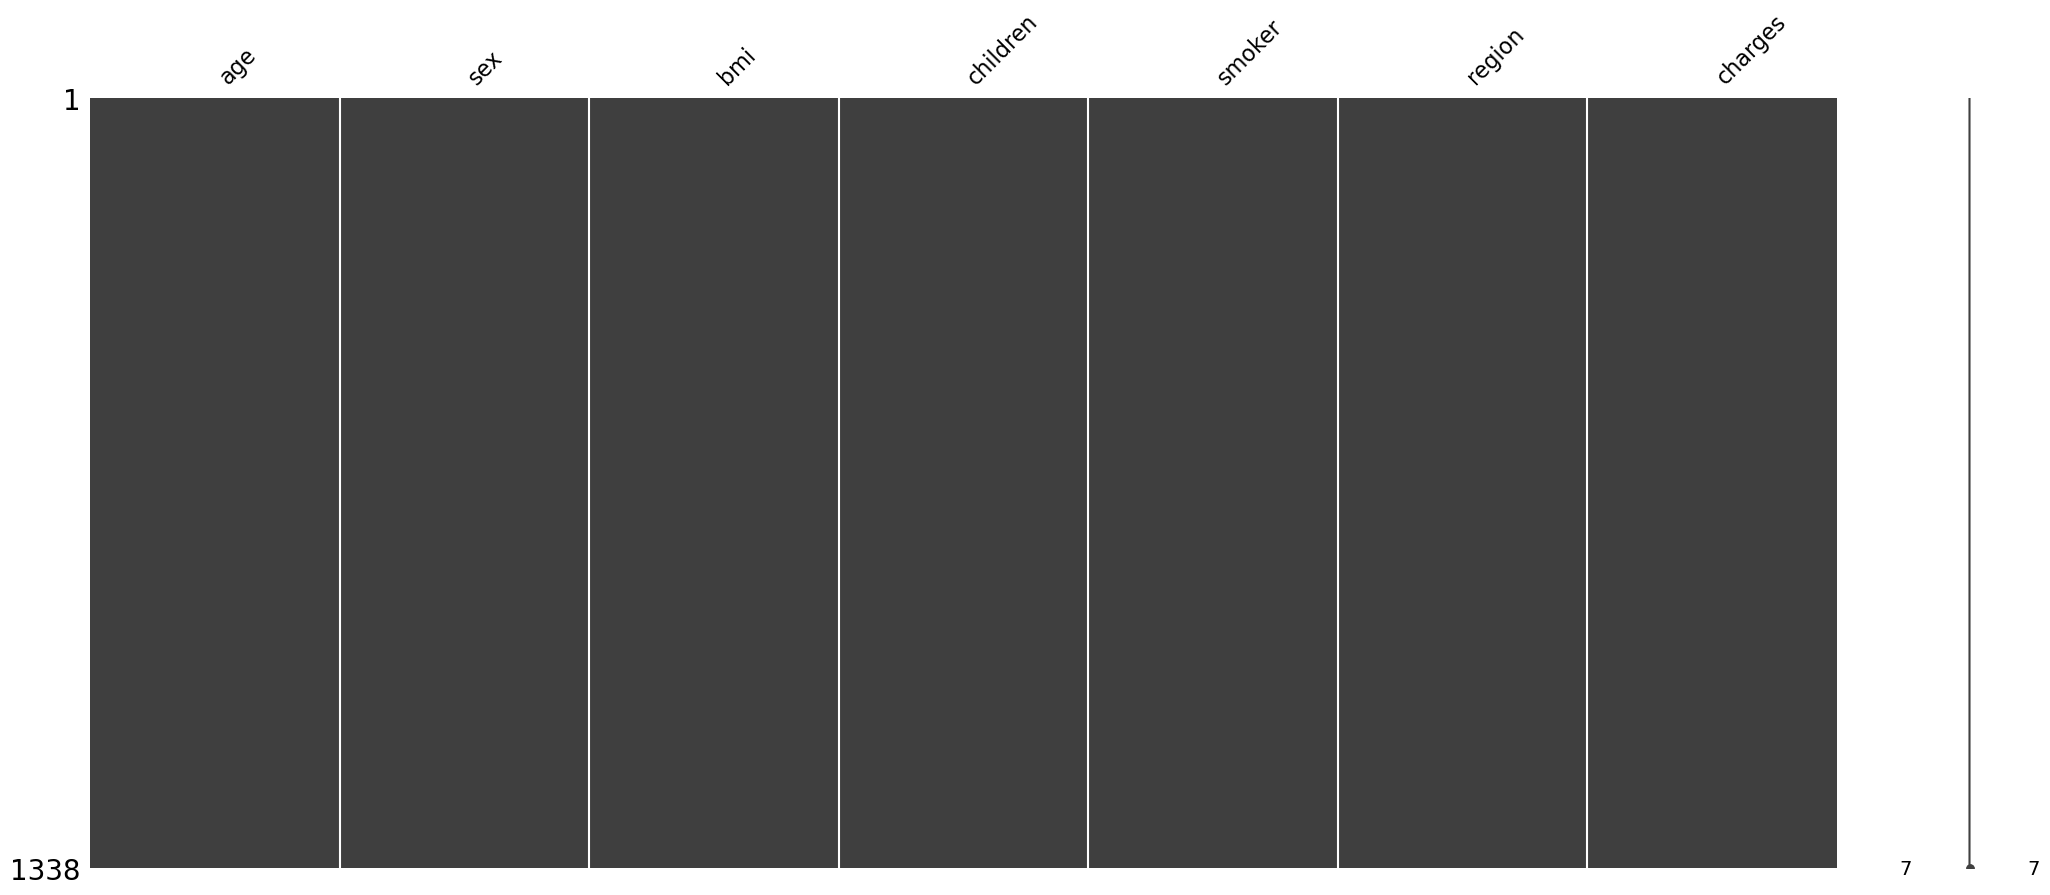

In [103]:
msno.matrix(df)


In [104]:
df[df.duplicated()]


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [105]:
df[(df["age"]==19 ) & (df["bmi"]==30.59)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.56310
526,19,female,30.59,2,no,northwest,24059.68019
581,19,male,30.59,0,no,northwest,1639.56310


In [106]:
df.loc[df.duplicated(keep=False),:]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [107]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [108]:
df["children"].sort_values(ascending=False)

1272    5
1130    5
1116    5
568     5
1245    5
       ..
618     0
619     0
623     0
624     0
1337    0
Name: children, Length: 1338, dtype: int64

In [109]:
df["charges"].sort_values(ascending=False)

543     63770.42801
1300    62592.87309
1230    60021.39897
577     58571.07448
819     55135.40209
           ...     
22       1137.01100
663      1136.39940
1244     1135.94070
808      1131.50660
940      1121.87390
Name: charges, Length: 1338, dtype: float64

In [110]:
df["age"].max()

64

In [111]:
df["age"].sort_values(ascending=False)

335     64
603     64
752     64
1265    64
534     64
        ..
942     18
46      18
295     18
50      18
648     18
Name: age, Length: 1338, dtype: int64

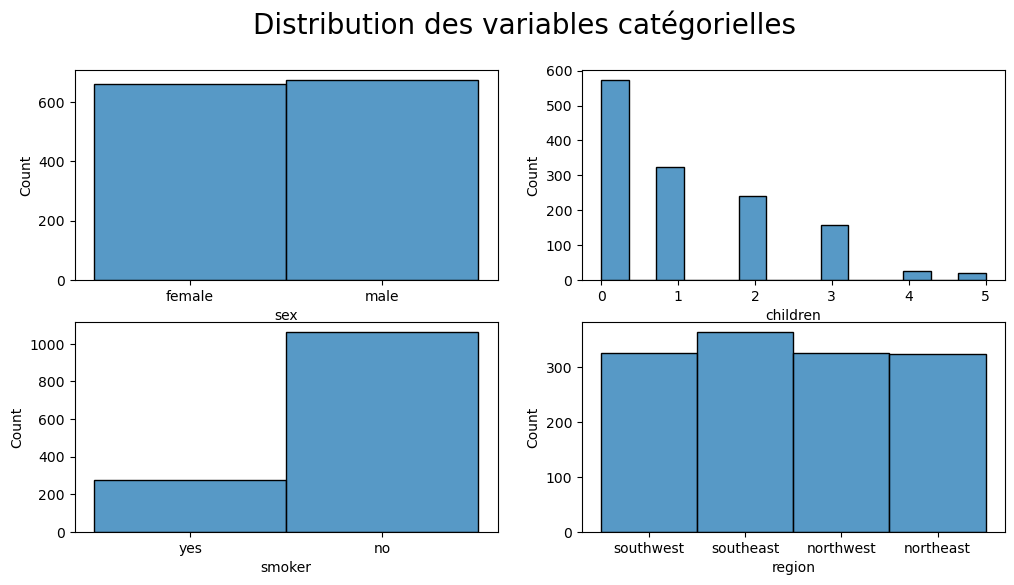

In [112]:
fig, ax = plt.subplots(2,2, figsize=(12, 6))
plt.suptitle('Distribution des variables catégorielles', fontsize=20)
sns.histplot(ax=ax[0,0],x='sex',data=df)
sns.histplot(ax=ax[0,1],x='children',data=df)
sns.histplot(ax=ax[1,0],x='smoker',data=df)
sns.histplot(ax=ax[1,1],x='region',data=df)
plt.show()


In [113]:
df.sort_values(by='bmi')

,age,sex,bmi,children,smoker,region,charges
172,18,male,15.960,0,no,northeast,1694.79640
428,21,female,16.815,1,no,northeast,3167.45585
1226,38,male,16.815,2,no,northeast,6640.54485
412,26,female,17.195,2,yes,northeast,14455.64405
1286,28,female,17.290,0,no,northeast,3732.62510
...,...,...,...,...,...,...,...
286,46,female,48.070,2,no,northeast,9432.92530
116,58,male,49.060,0,no,southeast,11381.32540
847,23,male,50.380,1,no,southeast,2438.05520
1047,22,male,52.580,1,yes,southeast,44501.39820


In [114]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='age', ylabel='Count'>

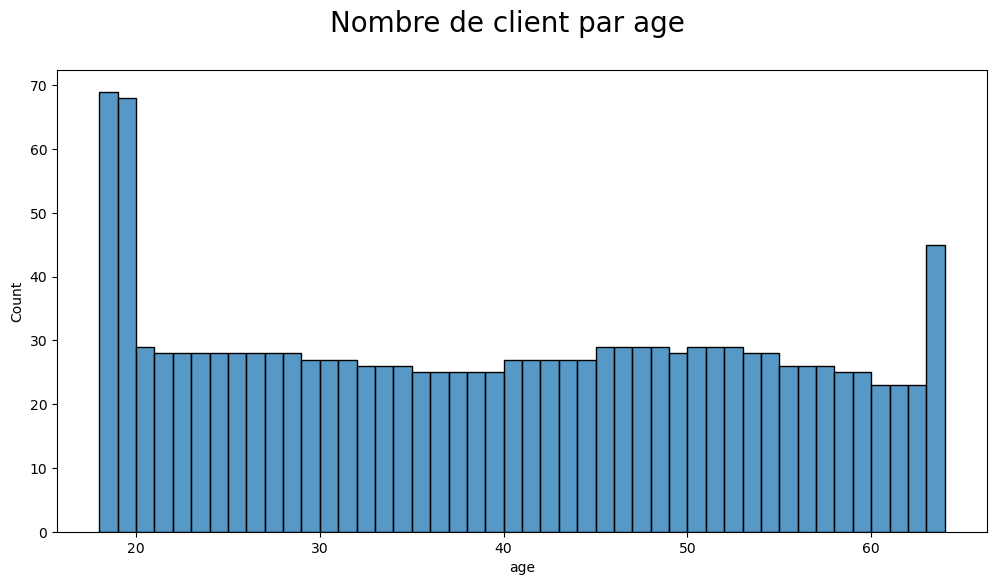

In [115]:
fig, ax = plt.subplots( figsize=(12, 6))
plt.suptitle('Nombre de client par age', fontsize=20)
sns.histplot(x='age',data=df,binwidth=1)

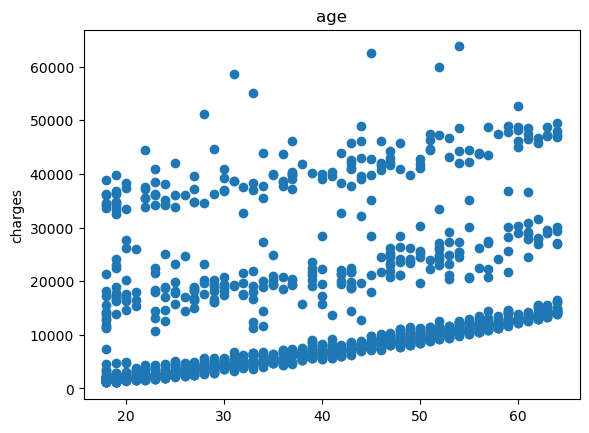

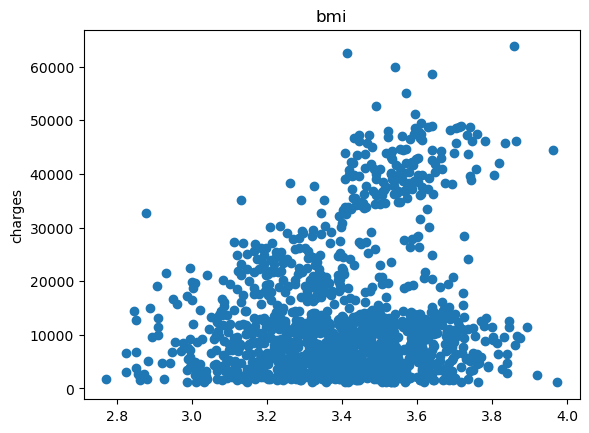

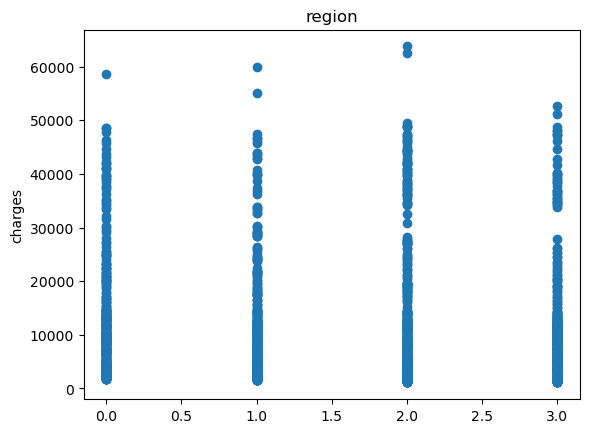

In [133]:
for column in ["age","bmi","region"] :
    plt.scatter(df[column],df["charges"])
    # plt.yscale('log')
    plt.ylabel("charges")
    plt.title(column)
    plt.show()



In [117]:
df['bmi'].skew()

0.2840471105987448

In [118]:
df['bmi'].kurtosis()

-0.05073153135467834

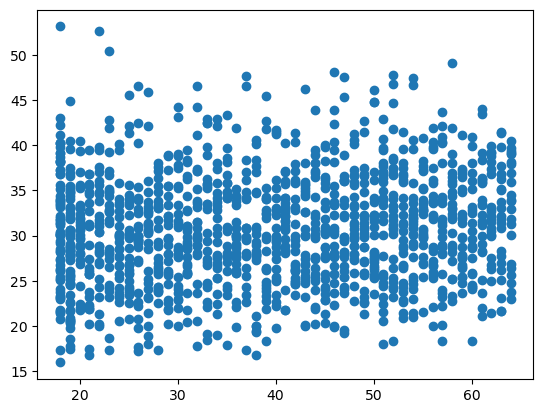

In [119]:
# créez le diagramme de dispersion
plt.scatter(df["age"], df["bmi"])

# affichez le diagramme
plt.show()

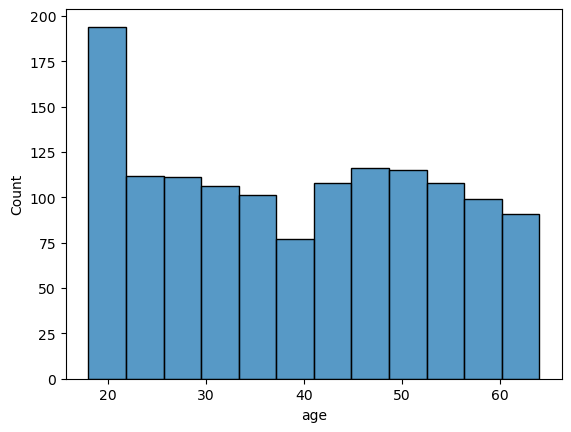

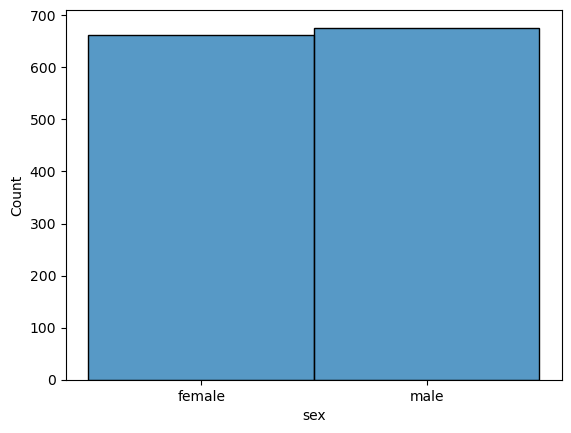

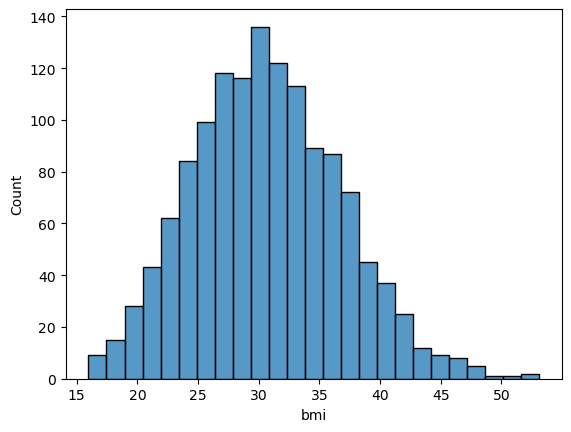

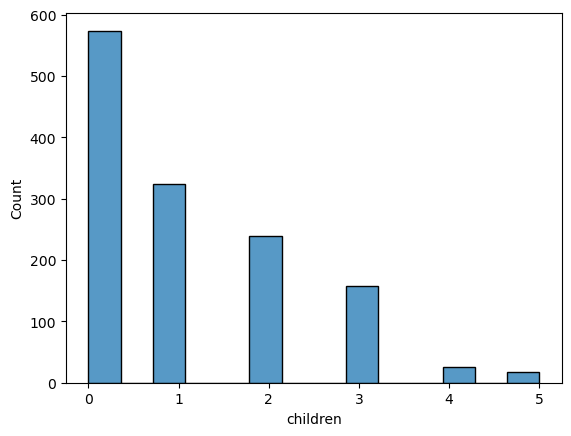

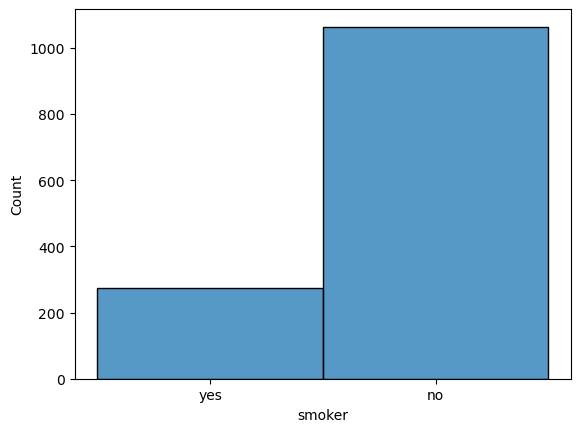

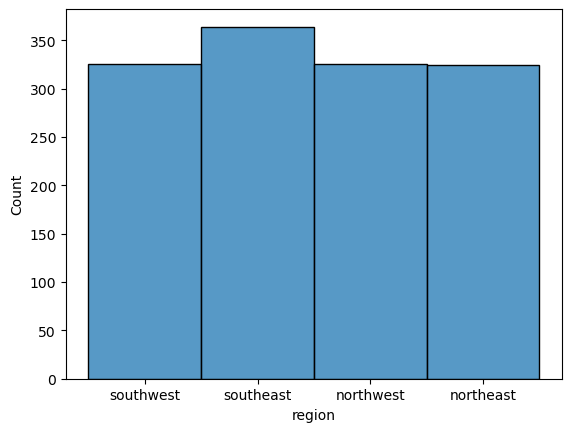

In [120]:
for col in df.columns[0:-1]:
  # afficher un histogramme de la colonne
  sns.histplot(data=df, x=col)
  plt.show()

In [121]:


for column in ["sex","smoker","region"]:
    df[column] = df[column].astype('category')
    df[column] = df[column].cat.codes

df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [122]:
df.corr()['charges'][:].sort_values(ascending=False)


charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

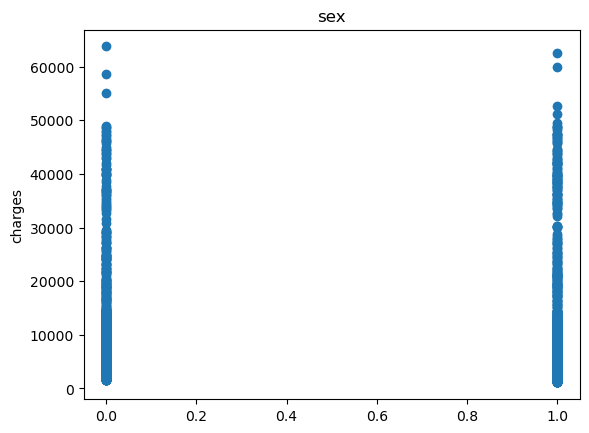

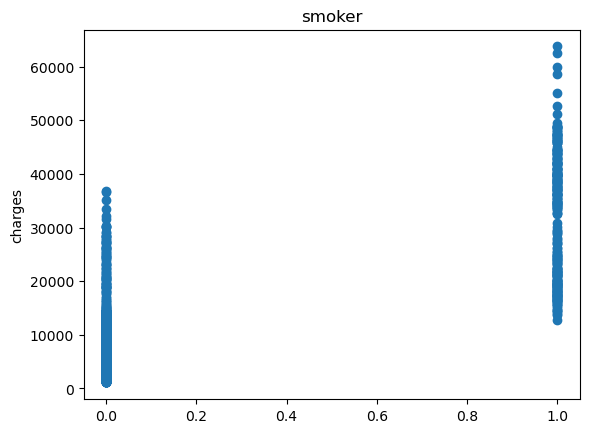

In [123]:
for column in ["sex","smoker"] :
    plt.scatter(df[column],df["charges"])
    # plt.yscale('log')
    plt.ylabel("charges")
    plt.title(column)
    plt.show()

In [124]:

# sélectionnez la colonne à tester
col = df['bmi']

# définissez la distribution théorique à comparer
distribution = 'norm'  # normal

# effectuez le test de Kolmogorov-Smirnov
stat, p = kstest(col, distribution)

# interprétez le résultat du test
if p > 0.05:
  print('Il y a une forte probabilité que les données suivent la distribution {} (p = {}).'.format(distribution, p))
else:
  print('Il y a une faible probabilité que les données suivent la distribution {} (p = {}).'.format(distribution, p))

Il y a une faible probabilité que les données suivent la distribution norm (p = 0.0).


<AxesSubplot:xlabel='bmi', ylabel='Count'>

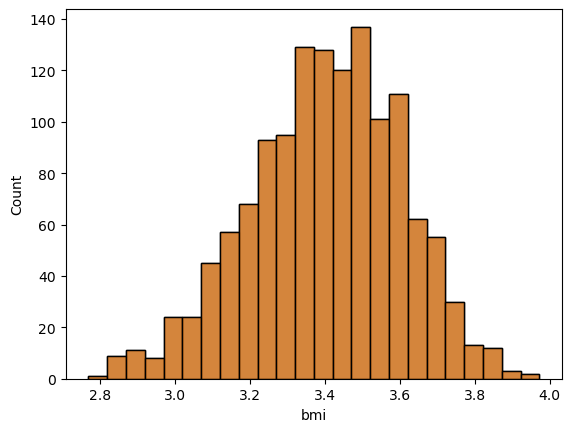

In [125]:


# sélectionnez la colonne à transformer
col = df['bmi']

# appliquez la transformation logarithmique à la colonne
df['bmi'] = np.log(col)

# affichez un histogramme de la colonne avant transformation
sns.histplot(data=df, x='bmi')

# affichez un histogramme de la colonne après transformation
sns.histplot(data=df, x='bmi')

In [126]:
# sélectionnez la colonne à tester
col = df['bmi']

# définissez la distribution théorique à comparer
distribution = 'norm'  # normal

# effectuez le test de Kolmogorov-Smirnov
stat, p = kstest(col, distribution)

# interprétez le résultat du test
if p > 0.05:
  print('Il y a une forte probabilité que les données suivent la distribution {} (p = {}).'.format(distribution, p))
else:
  print('Il y a une faible probabilité que les données suivent la distribution {} (p = {}).'.format(distribution, p))

Il y a une faible probabilité que les données suivent la distribution norm (p = 0.0).


In [131]:
# Création d'un DataFrame pandas avec les données


liste_df = []
for i in range(0,df["children"].max()+1):
    liste_df.append(df[df["children"]==i]["charges"])



# Réalisation du test ANOVA
f_statistic, p_value = f_oneway(*liste_df)

# Affichage du résultat du test
print(f"F-statistic: {f_statistic:.3f}, p-value: {p_value:.3f}")

F-statistic: 3.297, p-value: 0.006


In [134]:
# Création d'un DataFrame pandas avec les données


liste_df = []
for i in range(0,df["region"].max()+1):
    liste_df.append(df[df["region"]==i]["charges"])



# Réalisation du test ANOVA
f_statistic, p_value = f_oneway(*liste_df)

# Affichage du résultat du test
print(f"F-statistic: {f_statistic:.3f}, p-value: {p_value:.3f}")

F-statistic: 2.970, p-value: 0.031


In [135]:
# Création d'un DataFrame pandas avec les données


liste_df = []
for i in range(0,df["sex"].max()+1):
    liste_df.append(df[df["sex"]==i]["charges"])



# Réalisation du test ANOVA
f_statistic, p_value = f_oneway(*liste_df)

# Affichage du résultat du test
print(f"F-statistic: {f_statistic:.3f}, p-value: {p_value:.3f}")

F-statistic: 4.400, p-value: 0.036


In [136]:
# Création d'un DataFrame pandas avec les données


liste_df = []
for i in range(0,df["smoker"].max()+1):
    liste_df.append(df[df["smoker"]==i]["charges"])



# Réalisation du test ANOVA
f_statistic, p_value = f_oneway(*liste_df)

# Affichage du résultat du test
print(f"F-statistic: {f_statistic:.3f}, p-value: {p_value:.3f}")

F-statistic: 2177.615, p-value: 0.000
